In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Chapter 1
## 1.1 Waveguide Structure


In [2]:
n1 = 1.47   # Core (higher than cladding)
n0 = 1.455  # Cladding

# Max theta incident on waveguide for TIRF/ light acceptance angle in degrees:
theta_max = np.degrees(np.arcsin(np.sqrt(n1**2 - n0**2))) # (1.1)
NA = np.radians(theta_max)  # Numerical Aperture (1.4)

theta_max, NA

(12.090919733912804, 0.21102635895113511)

In [3]:
# Alternate way to calculate NA from change in refractive index of core and cladding using approximations
delta = (n1**2 - n0**2) / (2*n1**2)  # Relative refractive-index difference (1.3)
NA = n1*(2*delta)**0.5               # or np.sqrt(n1**2 - n0**2) or thetaMax in radians (1.4)
theta_max = np.degrees(NA)
delta, theta_max, NA

(0.01015201999167001, 12.001380279233029, 0.2094636006565328)

In [4]:
# Propagation angle inside core
phi_max = np.degrees(np.arcsin(np.sin(NA) / n1))  # (Snell's Law)
phi_max

8.1319080202503642

## 1.2 Formation of Guided Modes
Even at angles smaller than the critical angle, arbitrary angles are not able to propagate in a waveguide. Each mode is associated with light rays at a discrete angle of propagation as given by EM wave analysis.

In [5]:
# Inside the core for a plane wave propagating along z with angle phi:
lambda_0 = 1.54              # Free space wavelength (um) 
lam1 = lambda_0 / n1         # Wavelength inside the core
lam1

1.0476190476190477

In [6]:
k = 2*np.pi / lambda_0        # Free space wavenumber
k1 = n1 * k                   # Wavenumber in core

phi = phi_max                 # Set phi to correspond to light entering waveguide at theta max

beta = k * n1 * np.cos(np.radians(phi))   # Propagation constant in z, along waveguide (1.5)
kappa = k * n1 * np.sin(np.radians(phi))  # Propagation constant in x, laterial direction. (1.6)

phi, beta, kappa

(8.1319080202503642, 5.9372804657755713, 0.848373855477081)

In [7]:
# Condition for propagation angle phi (1.12)
lam_p = 2*np.pi / beta; lam_p  # Wavelength period along z

1.0582598116086859

In [8]:
eps = np.sin(np.radians(phi)) / np.sqrt(2*delta); eps  # (1.13)
# Note that this is normalised to 1 for when phi = phi_max

0.99270352504913439

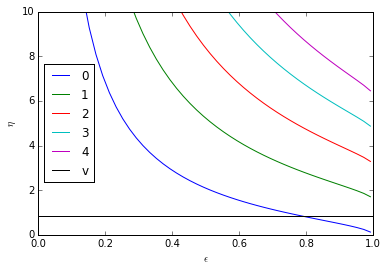

In [21]:
a = 2/2  # Half depth of waveguide (um)
mode = 5    # Mode numbers to plot

# Create linearly spaced array of eps corresponding to phi = 0.1 to phi_max for graph
eps = np.asarray([np.sin(np.radians(phi)) / np.sqrt(2*delta) for phi in np.linspace(0.1,phi_max)])

v = k*n1*a*np.sqrt(2*delta)  # Normalised frequency, LHS of dispersion eqn (1.15)

# Plot modes (fig 1.5b)
for m in range(mode):
    nu = (np.arccos(eps) + m*np.pi / 2 ) / eps  # (RHS dispersion eqn)
    plt.plot(eps,nu, label=m)

plt.axhline(v, color='black', label='v')        # Plot the line corresponding to V
plt.xlim(0,1); plt.ylim(0,10); plt.legend(loc='best');
plt.xlabel('$\epsilon$'); plt.ylabel('$\eta$')

The crossing point between v (a function of the core refractive index, the cladding refractive index, the wavelength and the core diameter) and $\eta$, or v = $\eta$, gives $\varepsilon_m$ for each mode. When v < v$_c$ = $\pi$/2 the waveguide only supports one mode. The propagation constant, $\beta_m$, for each mode may be obtained as follows:

In [35]:
import scipy.optimize as optimize

# Solve for epsilon_m where m is mode number
m = 0   # Use only mode 0 as this is the only mode where v crosses eta between eps= 0:1
def func(eps):
    nu = (np.arccos(eps) + m*np.pi / 2 ) / eps
    return nu - v

eps_m = optimize.brentq(func, 0.01, 1)

In [36]:
delta = (n1**2 - n0**2) / (2*n1**2)        # (1.3)
phi = np.arcsin(eps_m * np.sqrt(2*delta))  # Returns phi in radians - propagation angle of mode m (1.13)
beta = k * n1 * np.cos(phi)                # Beta of mode m (1.5)
np.degrees(phi), beta

(6.4131216967771874, 5.9600552701648795)

In [41]:
vc = np.pi / 2                                      # Cutoff v-value above which waveguide is not single mode

lam_c = (2*np.pi / vc) * a * n1 * np.sqrt(2*delta)  # (1.16)

print('Waveguide is single moded for lambda > %.2f um' % lam_c)

if v <= np.pi/2:
    print('Single Mode Achieved. Core wavelength: %.2f um' % (lambda_0 / n1)) 
else:
    print('Structure supports more than one mode')

Waveguide is single moded for lambda > 0.84 um
Single Mode Achieved. Core wavelength: 1.05


# 1.3 Maxwell's Equations